<a href="https://colab.research.google.com/github/Dilavarj7/Facebook-Comment-Volume/blob/main/Dilavar_Singh_Team_5_Facebook_Comment_Volume_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>Project Title : Facebook Comment Volume Dataset Data Set</b>

---



## **Data Set Information:**

---
### The dataset contains 5 variants of the dataset, for the details about the variants and detailed analysis read and cite the research paper.



## **Attribute Information:**

---
<br>


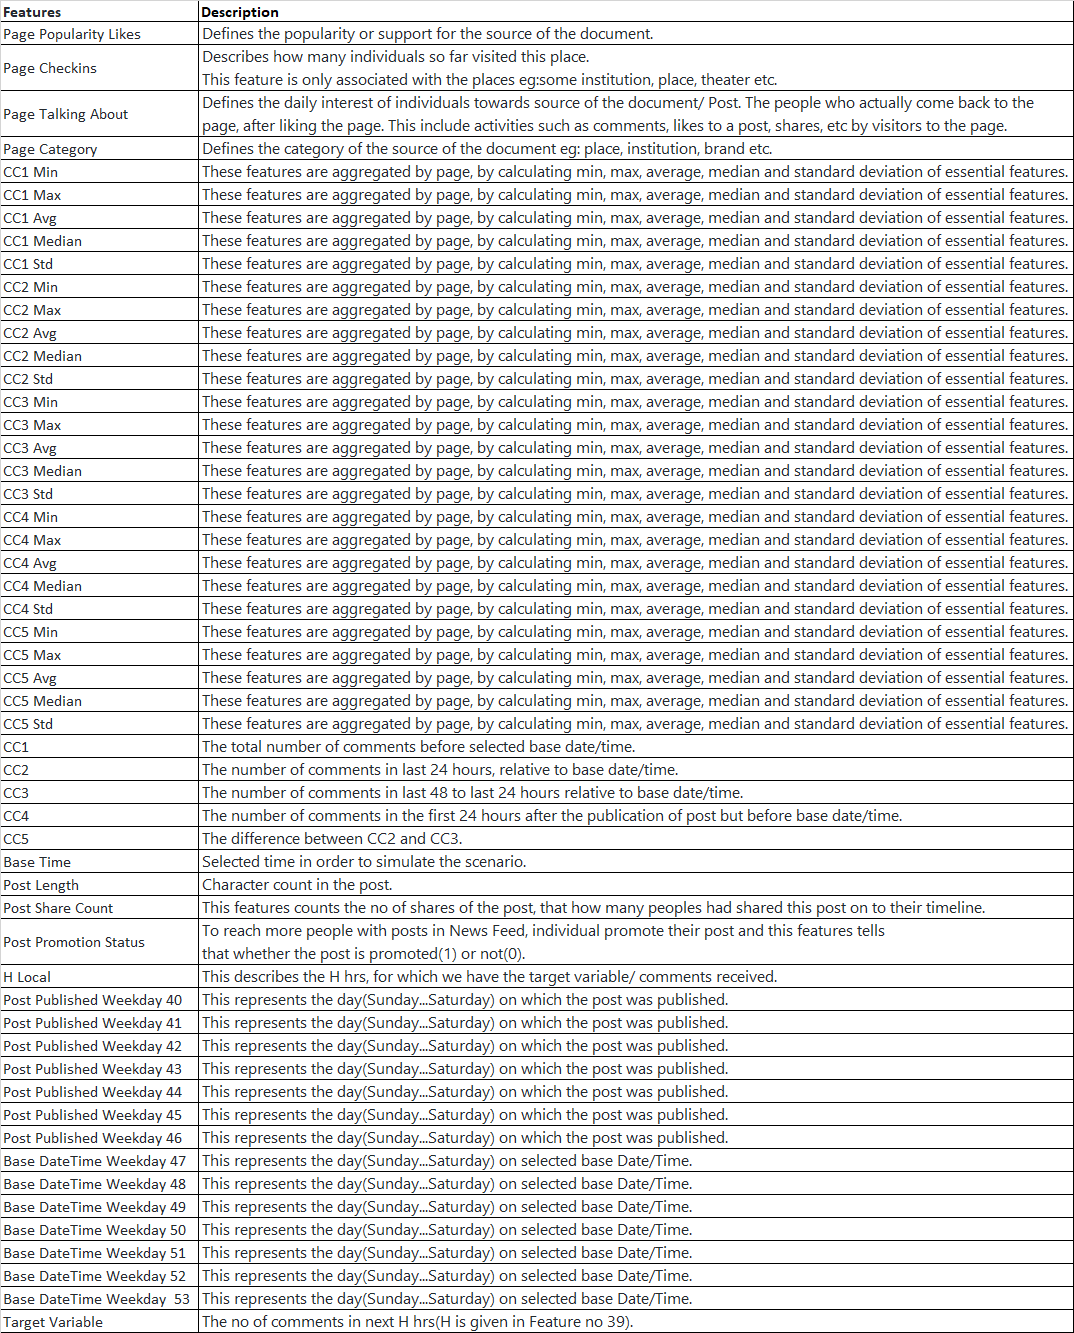

## **Importing Important libraray and connecting Drive**

In [1]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Reading Training and Test Data**

In [3]:
columns=['Likes','Checkins','Returns','Category','CC1_min','CC1_max','CC1_avg','CC1_med','CC1_sd','CC2_min','CC2_max','CC2_avg','CC2_med','CC2_sd','CC3_min','CC3_max','CC3_avg','CC3_med','CC3_sd','CC4_min','CC4_max','CC4_avg','CC4_med','CC4_sd','CC5_min','CC5_max','CC5_avg','CC5_med','CC5_sd','CC1','CC2','CC3','CC4','CC5','base_time','post_length','post_share_count','post_promotion_status','H_local','sun_post_day','mon_post_day','tue_post_day','wed_post_day','thu_post_day','fri_post_day','sat_post_day','sun_base_day','mon_base_day','tue_base_day','wed_base_day','thu_base_day','fri_base_day','sat_base_day','output']
test_files = ['Test_Case_1.csv', 'Test_Case_2.csv']
test_file_location = '/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 2/Day 1/data/dat/test/'

In [4]:
df_train = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 2/Day 1/data/dat/train/Features_Variant_1.csv', header=None)

In [5]:
df_test = pd.concat([pd.read_csv(test_file_location + csv_file_test, header=None) for csv_file_test in test_files])

In [6]:
dataset=pd.concat([df_train,df_test])
dataset.columns=columns

In [8]:
#First Look
dataset.head(5)

,Likes,Checkins,Returns,Category,CC1_min,CC1_max,CC1_avg,CC1_med,CC1_sd,CC2_min,CC2_max,CC2_avg,CC2_med,CC2_sd,CC3_min,CC3_max,CC3_avg,CC3_med,CC3_sd,CC4_min,CC4_max,CC4_avg,CC4_med,CC4_sd,CC5_min,CC5_max,CC5_avg,CC5_med,CC5_sd,CC1,CC2,CC3,CC4,CC5,base_time,post_length,post_share_count,post_promotion_status,H_local,sun_post_day,mon_post_day,tue_post_day,wed_post_day,thu_post_day,fri_post_day,sat_post_day,sun_base_day,mon_base_day,tue_base_day,wed_base_day,thu_base_day,fri_base_day,sat_base_day,output
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.85058,0,0,0,0,0,65,166,2,0,24,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.85058,0,0,0,0,0,10,132,1,0,24,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.85058,0,0,0,0,0,14,133,2,0,24,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.85058,7,0,3,7,-3,62,131,1,0,24,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.85058,1,0,0,1,0,58,142,5,0,24,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [9]:
dataset.describe()

,Likes,Checkins,Returns,Category,CC1_min,CC1_max,CC1_avg,CC1_med,CC1_sd,CC2_min,CC2_max,CC2_avg,CC2_med,CC2_sd,CC3_min,CC3_max,CC3_avg,CC3_med,CC3_sd,CC4_min,CC4_max,CC4_avg,CC4_med,CC4_sd,CC5_min,CC5_max,CC5_avg,CC5_med,CC5_sd,CC1,CC2,CC3,CC4,CC5,base_time,post_length,post_share_count,post_promotion_status,H_local,sun_post_day,mon_post_day,tue_post_day,wed_post_day,thu_post_day,fri_post_day,sat_post_day,sun_base_day,mon_base_day,tue_base_day,wed_base_day,thu_base_day,fri_base_day,sat_base_day,output
count,4.114900e+04,41149.000000,4.114900e+04,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.0,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000
mean,1.330369e+06,4677.492163,4.631141e+04,24.236482,1.629833,444.712241,55.954790,35.765377,67.769170,0.235364,286.662641,22.414120,7.654986,40.769006,0.025347,268.502224,19.680756,4.909184,38.809613,1.540451,416.757175,52.863527,34.161839,63.453864,-220.071423,276.860677,2.733363,-1.873107,56.169210,56.054193,22.464118,19.727454,52.958274,2.736664,35.236506,163.709300,117.309777,0.0,23.718827,0.122700,0.143138,0.149019,0.156723,0.144572,0.146784,0.137063,0.142458,0.132980,0.136966,0.147877,0.150648,0.143916,0.145155,7.421760
std,6.818645e+06,20607.481062,1.227042e+05,19.945773,21.055385,499.141585,87.772227,70.496128,82.276262,10.128022,377.393789,37.860108,22.706436,55.031239,1.995709,328.092312,31.332800,13.259591,51.249632,19.056051,474.703343,82.101373,66.683799,77.071828,282.604760,376.262352,18.559900,15.884149,74.753516,138.755381,78.597688,71.909664,129.929839,95.579482,20.932872,376.657344,943.133918,0.0,2.136178,0.328097,0.350218,0.356112,0.363544,0.351673,0.353894,0.343918,0.349523,0.339557,0.343815,0.354983,0.357709,0.351009,0.352262,35.929936
min,3.600000e+01,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2119.000000,-204.000000,-210.500000,-288.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1366.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.714900e+04,0.000000,7.010000e+02,9.000000,0.000000,45.000000,5.527273,2.000000,8.278756,0.000000,26.000000,1.911290,0.000000,4.109465,0.000000,26.000000,2.030303,0.000000,4.094580,0.000000,42.000000,5.218182,2.000000,7.600215,-310.000000,23.000000,-0.483221,-2.000000,6.078892,2.000000,0.000000,0.000000,2.000000,-6.000000,17.000000,38.000000,2.000000,0.0,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.977020e+05,0.000000,7.237000e+03,18.000000,0.000000,241.000000,23.374101,12.000000,35.853805,0.000000,118.000000,8.437500,2.000000,17.507979,0.000000,116.000000,8.584270,1.000000,18.639984,0.000000,224.000000,21.859375,12.000000,32.368848,-92.000000,109.000000,0.273810,0.000000,25.547172,11.000000,2.000000,0.000000,11.000000,0.000000,35.000000,97.000000,13.000000,0.0,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.204214e+06,99.000000,5.141100e+04,32.000000,0.000000,717.000000,71.828829,42.000000,102.554954,0.000000,405.000000,29.005525,8.000000,61.379848,0.000000,381.000000,24.842520

## **Removing dublicate record from our Dataset**

In [10]:
# duplicate observation check
len(dataset[dataset.duplicated()])

8

In [11]:
# removing duplicate observations
dataset=dataset.drop_duplicates()

In [12]:
dataset['Category'].value_counts()

9     7548
24    4520
18    4306
36    2390
16    1896
      ... 
78       1
37       1
93       1
41       1
70       1
Name: Category, Length: 88, dtype: int64

In [13]:
dataset['Checkins'].value_counts()

0        25599
1         1341
148        489
11         459
4          390
         ...  
45           1
69           1
938          1
59780        1
373          1
Name: Checkins, Length: 184, dtype: int64

In [14]:
dataset['post_promotion_status'].value_counts()

0    41141
Name: post_promotion_status, dtype: int64

1. As we can see we have too much unique value for Categoryand checkins feature So, it's better to drop these features from our dataset.
2. We can also drop post_promotion_status this feature becuase we have only one unique value.

In [16]:
dataset = dataset.drop(['Category','Checkins','post_promotion_status'],axis=1)

In [17]:
days_columns=['sun_post_day','mon_post_day','tue_post_day','wed_post_day','thu_post_day','fri_post_day','sat_post_day','sun_base_day','mon_base_day','tue_base_day','wed_base_day','thu_base_day','fri_base_day','sat_base_day']
dataset[days_columns] = dataset[days_columns].astype('category')

In [19]:
dataset = dataset.drop(['CC3','CC3_min','CC3_max','CC3_avg','CC3_med','CC3_sd'],axis=1)

In [20]:
dataset = dataset.drop(['sat_post_day','sat_base_day'],axis=1)


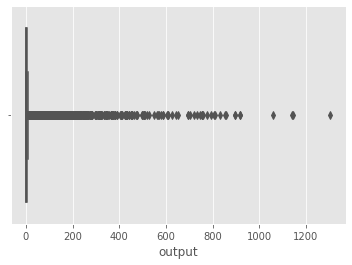

In [21]:
# Boxplot for Output Variable
sns.boxplot(x='output',data=dataset)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


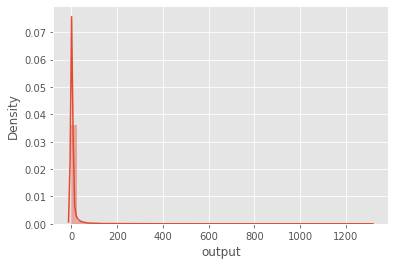

In [22]:
# distplot for Output Variable
sns.distplot(dataset['output'])

### **HeatMap for Our Dataset**

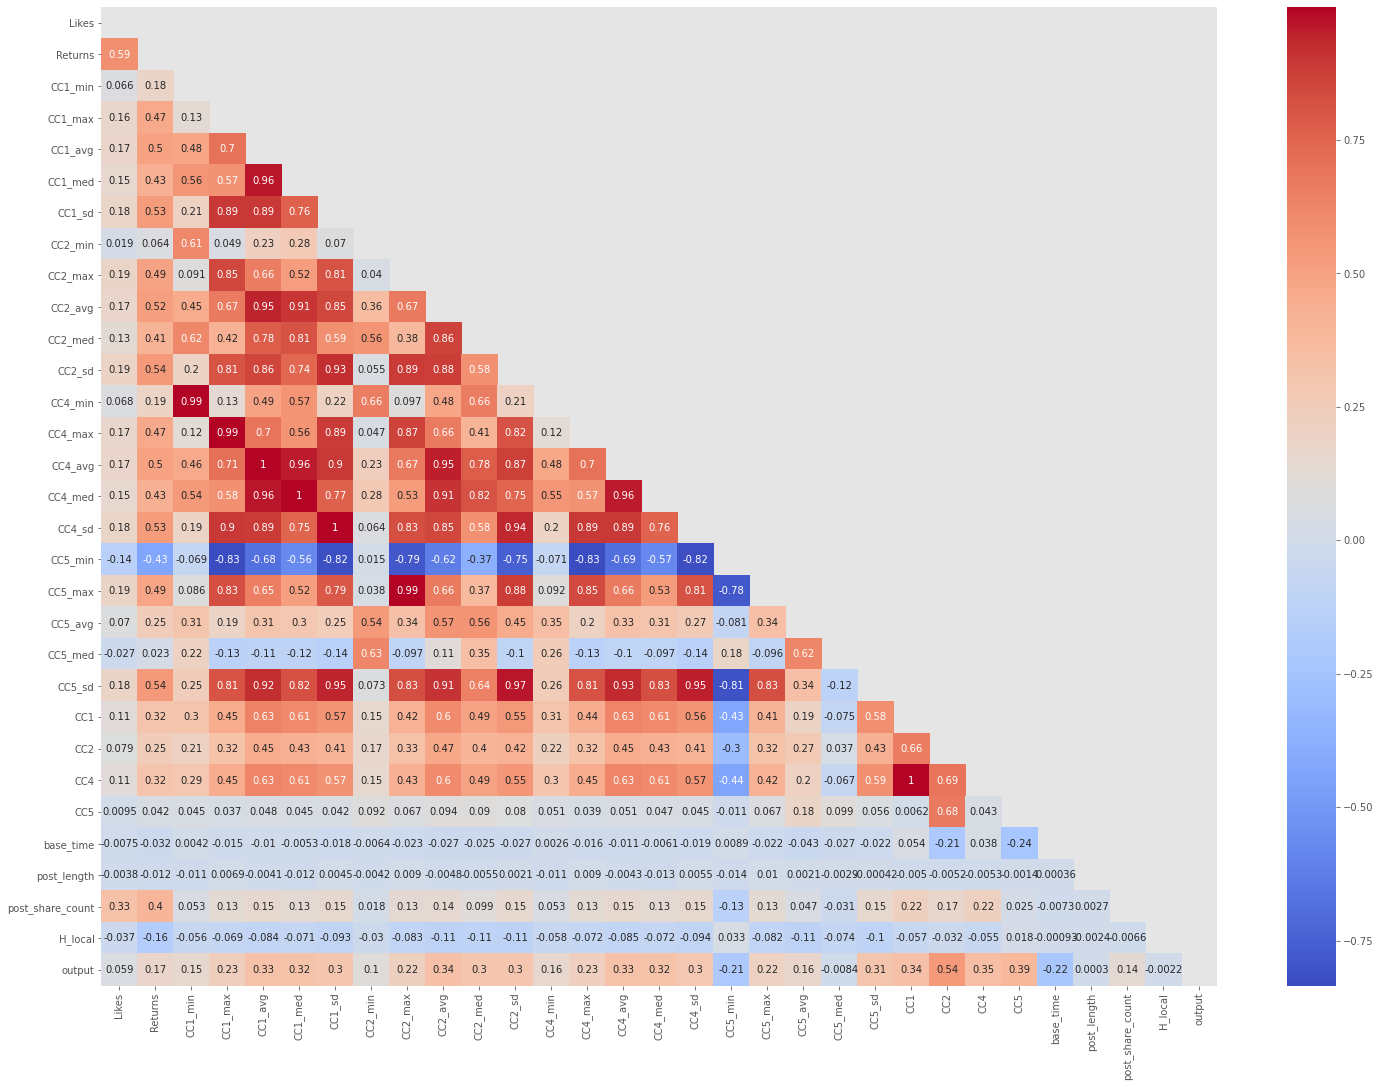

In [29]:
plt.figure(figsize=(25,18))
cor= dataset.corr()
mask = np.triu(cor)
sns.heatmap(dataset.corr(),annot=True,cmap='coolwarm',mask=mask)

###As We can see for our dataframe some of the independent variable is heighly cor-related.But we can not drop any features because all the features have generated by featue Engineering.

## **Let's make train and test Data for Machine Learning Modeling...**

In [30]:
dependent_variable = 'output'
# Create a list of independent variables
independent_variables = list(set(dataset.columns.tolist()) - {dependent_variable})

### **Train Data**

In [33]:
# Create train data 
X=dataset.iloc[:40941]
# Create train data of independent variables
X_train = X[independent_variables].values
# Create train data of dependent variable 
y_train = X[dependent_variable].values

### **Test Data**

In [31]:
# Create test data 
X1=dataset.iloc[-200:]
# Create test data of independent variables
X_test = X1[independent_variables].values
# Create test data of dependent variable 
y_test = X1[dependent_variable].values

In [32]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

NameError: ignored

## **Preprocessing the Data With StandardScaler**

In [34]:
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [35]:
X_train[0]

array([0.00000000e+00, 0.00000000e+00, 7.60269966e-05, 5.53783345e-03,
       0.00000000e+00, 3.87686388e-01, 3.96516691e-01, 0.00000000e+00,
       3.94344786e-01, 9.02777778e-01, 9.63845542e-02, 1.30389152e-03,
       1.00993742e-01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.31701827e-02,
       4.82317163e-03, 4.27167877e-04, 0.00000000e+00, 3.44297309e-01,
       0.00000000e+00, 0.00000000e+00, 1.47880919e-01, 0.00000000e+00,
       6.90326455e-06, 5.20020801e-04, 1.30257802e-01, 3.93896353e-03,
       0.00000000e+00, 1.00000000e+00, 3.69047619e-01, 7.72811918e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.99152131e-02, 4.42400350e-01])

# **Applying All the Machine Learning Models to choose best One**

---



In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error,median_absolute_error,mean_squared_error

In [37]:
#declare the models
linear_reg = LinearRegression()
lasso = Lasso(alpha=0.01,random_state=42,tol=0.01)
ridge = Ridge( alpha=1.0, solver='cholesky',random_state=42)
dt_model=DecisionTreeRegressor(max_depth=10,max_leaf_nodes=11,min_samples_leaf=9, min_samples_split=7,random_state = 42)
rf_model=RandomForestRegressor(max_depth=10,max_leaf_nodes=11,min_samples_leaf=9, min_samples_split=7,random_state = 42)
gbc_model=GradientBoostingRegressor(max_depth=10,max_leaf_nodes=11,min_samples_leaf=9, min_samples_split=7)
xgboost = XGBRegressor(n_estimators=50,objective='reg:squarederror',max_depth=10,max_leaf_nodes=11,min_samples_leaf=9,reg_alpha=4,learning_rate=.050 ,min_samples_split=7,random_state = 42)
knn = KNeighborsRegressor(n_neighbors=10,metric='minkowski')

#create a list of models
models=[linear_reg,lasso,ridge,dt_model,rf_model,gbc_model,xgboost,knn]

lst_imp=[]
# fuction for calculation the eveluation matrix
def score_model(X_train,y_train,X_test,y_test):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns)
    i=0
    n1=len(X_train)+len(X_test)
    n2=len(y_train)+len(y_test)
    n3=len(dataset.columns)-1
    #read model one by one
    for model in models:
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        y_pred_train=model.predict(X_train)
        
        #compute metrics

        train_MSE=mean_squared_error(y_train, y_pred_train)
        MSE=mean_squared_error(y_test,y_pred)
        train_RMSE=np.sqrt(train_MSE)
        RMSE=np.sqrt(MSE)
        train_MAE=mean_absolute_error(y_train,y_pred_train)
        MAE=mean_absolute_error(y_test,y_pred)
        r2_score_train=r2_score(y_train,y_pred_train)
        r2_score_test=r2_score(y_test,y_pred)
        train_adjusted_R2=1-((1-r2_score_train)*(n2-1)/(n2-n3-1))
        test_adjusted_R2=1-((1-r2_score_test)*(n2-1)/(n2-n3-1))
        
        #insert in dataframe
        df.loc[i,"Model Name"]=model.__class__.__name__
        df.loc[i,"Train MSE"]=round(train_MSE,2)
        df.loc[i,"Test MSE"]=round(MSE,2)
        df.loc[i,"Train RMSE"]=round(train_RMSE,2)
        df.loc[i,"Test RMSE"]=round(RMSE,2)
        df.loc[i,"Train MAE"]=round(train_MAE,2)
        df.loc[i,"Test MAE"]=round(MAE,2)
        df.loc[i,"Train R2 Score"]=round(r2_score_train,2)
        df.loc[i,"Test R2 Score"]=round(r2_score_test,2)
        df.loc[i,'Train Adjusted R2'] = round(train_adjusted_R2,2)
        df.loc[i,'Test Adjusted R2'] = round(test_adjusted_R2,2)


        i+=1
    # Return the data frame and dictionary
    return df

In [38]:
result_df=score_model(X_train,y_train,X_test,y_test)

In [39]:
result_df

,Model Name,Train MSE,Test MSE,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R2 Score,Test R2 Score,Train Adjusted R2,Test Adjusted R2
0,LinearRegression,850.86,3190.35,29.17,56.48,8.29,22.85,0.32,0.56,0.32,0.56
1,Lasso,864.74,2919.85,29.41,54.04,8.21,21.14,0.31,0.60,0.31,0.60
2,Ridge,857.50,3043.50,29.28,55.17,8.30,21.11,0.32,0.58,0.32,0.58
3,DecisionTreeRegressor,536.09,2806.87,23.15,52.98,5.93,20.74,0.57,0.61,0.57,0.61
4,RandomForestRegressor,468.06,2638.71,21.63,51.37,5.38,19.67,0.63,0.64,0.63,0.64
5,GradientBoostingRegressor,199.87,2297.67,14.14,47.93,3.45,20.15,0.84,0.68,0.84,0.68
6,XGBRegressor,60.48,2270.61,7.78,47.65,2.10,16.88,0.95,0.69,0.95,0.69
7,KNeighborsRegressor,675.40,5375.03,25.99,73.31,5.24,27.07,0.46,0.26,0.46,0.26


###From above it's clear that models XGBRegressor,RandomForestRegressor,GradientBoostingRegressor is having a good r2_score for test and train dataset so we can include this all for our oprimal model and we can apply some hypertuning parameter.

# **Function to predict on the Test and Train and evaluate the metrics**

In [40]:
def Model_performance(model,X_train,X_test, y_train,y_test):
        
        n1=len(X_train)+len(X_test)
        n2=len(y_train)+len(y_test)
        n3=len(dataset.columns)-1
        
        #Train
        model.fit(X_train,y_train)
        y_pred_train =model.predict(X_train)
        y_pred = model.predict(X_test)
        #Evaluation metrics
        train_MSE=mean_squared_error(y_train, y_pred_train)
        MSE=mean_squared_error(y_test,y_pred)
        train_RMSE=np.sqrt(train_MSE)
        RMSE=np.sqrt(MSE)
        train_MAE=mean_absolute_error(y_train,y_pred_train)
        MAE=mean_absolute_error(y_test,y_pred)
        r2_score_train=r2_score(y_train,y_pred_train)
        r2_score_test=r2_score(y_test,y_pred)
        train_adjusted_R2=1-((1-r2_score_train)*(n2-1)/(n2-n3-1))
        test_adjusted_R2=1-((1-r2_score_test)*(n2-1)/(n2-n3-1))

        evaluation={'Train R2_score':r2_score_train,'Test R2_score':r2_score_test,'Adjusted R2_score Train':train_adjusted_R2,
                     'Adjusted R2_score Test':test_adjusted_R2,'Train MSE':train_MSE,"Test MSE":MSE,'Train RMSE':train_RMSE,
                     'Test RMSE':RMSE,'Train MAE':train_MAE,'Test MAE':MAE}
        return evaluation,model.__class__.__name__

## **RandomForestRegressor**

In [42]:
rndm_fst=RandomForestRegressor(
                      max_depth=10,
                      max_leaf_nodes=11,
                      min_samples_leaf=9,
                      min_samples_split=7,
                      random_state = 42,
                      n_estimators=60,
                      min_impurity_decrease=0.01,
                      oob_score=True)

In [43]:
evel_metrics,model_name=Model_performance(rndm_fst,X_train,X_test, y_train,y_test)

In [44]:
evel_metrics

{'Adjusted R2_score Test': 0.6342730977155622,
 'Adjusted R2_score Train': 0.6267349599886981,
 'Test MAE': 19.4472596191873,
 'Test MSE': 2647.3600003433216,
 'Test R2_score': 0.6346464698569317,
 'Test RMSE': 51.45250237202581,
 'Train MAE': 5.398726093591597,
 'Train MSE': 469.85957191795836,
 'Train R2_score': 0.6271160278467554,
 'Train RMSE': 21.67624441451882}

## **GradientBoostingRegressor**

In [47]:
grdt_bfr_fst=GradientBoostingRegressor(
                      learning_rate=0.1,
                      max_depth=10,
                      max_leaf_nodes=11,
                      min_samples_leaf=9,
                      min_samples_split=7,
                      random_state = 42,
                      n_estimators=60,
                      min_impurity_decrease=0.01)

In [48]:
evel_metrics1,model_name1=Model_performance(grdt_bfr_fst,X_train,X_test, y_train,y_test)

In [49]:
evel_metrics1

{'Adjusted R2_score Test': 0.6768908334062531,
 'Adjusted R2_score Train': 0.8091370844199105,
 'Test MAE': 20.326806816585268,
 'Test MSE': 2338.8661814090174,
 'Test R2_score': 0.6772206969210062,
 'Test RMSE': 48.36182566248939,
 'Train MAE': 3.7156132755064664,
 'Train MSE': 240.25493468865704,
 'Train R2_score': 0.8093319371776734,
 'Train RMSE': 15.500159182687675}

## **XGBoost**

In [50]:
xb_boost = XGBRegressor(max_depth=7,
                    learning_rate=.055,
                    min_child_weight = 3,
                    max_leaf_nodes= 15,
                    min_samples_leaf=6, 
                    reg_alpha=5,
                    min_samples_split=1,
                    n_jobs=-1,
                    colsample_bytree = 0.5,
                    random_state = 45,
                    n_estimators=60,
                    objective='reg:squarederror')

In [51]:
evel_metrics2,model_name2=Model_performance(xb_boost,X_train,X_test, y_train,y_test)

In [52]:
evel_metrics2

{'Adjusted R2_score Test': 0.664670001345336,
 'Adjusted R2_score Train': 0.8837311618882673,
 'Test MAE': 20.683258673995734,
 'Test MSE': 2427.328205304167,
 'Test R2_score': 0.6650123411592276,
 'Test RMSE': 49.2679226810322,
 'Train MAE': 3.089519143852141,
 'Train MSE': 146.35720104117715,
 'Train R2_score': 0.8838498612368499,
 'Train RMSE': 12.097818028106438}

### **Feature Importances Graph**

In [53]:
features = X[independent_variables].columns
importances = xb_boost.feature_importances_
indices = np.argsort(importances)

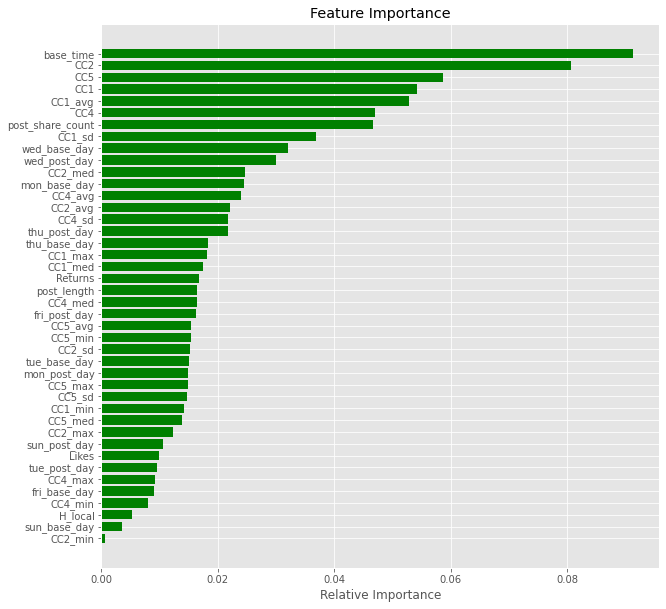

In [54]:
plt.figure(figsize=(10,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# **Conclusion**

---
### We can conclude below point from above...
* ### GradiantBoostRegressor and XGBoostRegressor is occuring overfit while we are doing modeling.
* ### XGBoostRegressor is giving a best result for r2_score for test as well as train data.but it's facing probem of overfitting.
* ### RandomForestRegression is also giving good result of r2_score for train and test data. and it's also not facing overfitting problem.
* ### In case of Linear Model and regularization we are getting r2_score for test data higher than train data.
* ### Base Time,CC2,CC5,CC1 is most importance features for XGBoostRegressor machine learning model.

### So, **XGBoostRegressor** is our optimal model to use to predict number of comment on facebook in given hours.

# **Thanks :)**